Hypertension Risk Prediction - v1.00

In [ ]:
import pandas as pd

# load the dataset
df = pd.read_csv('../data/hypertension_dataset.csv')

df.head()


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [ ]:
# check missing values
print("Missing values:\n", df.isnull().sum())

# data types
print("\nData types:\n", df.dtypes)

print("\nHypertension value counts:\n", df['Has_Hypertension'].value_counts()) 



Missing values:
 Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

Data types:
 Age                   int64
Salt_Intake         float64
Stress_Score          int64
BP_History           object
Sleep_Duration      float64
BMI                 float64
Medication           object
Family_History       object
Exercise_Level       object
Smoking_Status       object
Has_Hypertension     object
dtype: object

Hypertension value counts:
 Has_Hypertension
Yes    1032
No      953
Name: count, dtype: int64


In [ ]:
# missing medication values ="None"
df['Medication'] = df['Medication'].fillna('None')

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Age                 0
Salt_Intake         0
Stress_Score        0
BP_History          0
Sleep_Duration      0
BMI                 0
Medication          0
Family_History      0
Exercise_Level      0
Smoking_Status      0
Has_Hypertension    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using Label Encoding
df_encoded = df.copy()
categorical_cols = ['BP_History', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status']

encoders = {} 

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le 

# Encode the target variable 'Has_Hypertension'
df_encoded['Has_Hypertension'] = df_encoded['Has_Hypertension'].map({'No': 0, 'Yes': 1})


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df_encoded.drop('Has_Hypertension', axis=1)
y = df_encoded['Has_Hypertension']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (1588, 10)
Test set: (397, 10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize the model
rf_model = RandomForestClassifier(random_state=42)

# train the model
rf_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.967

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       192
           1       0.98      0.96      0.97       205

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.97      0.97      0.97       397


Confusion Matrix:
[[187   5]
 [  8 197]]


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, '../models/rf_model.pkl')

# Save the feature columns and label encoders
feature_columns = df_encoded.columns.tolist()
feature_columns.remove('Has_Hypertension')
joblib.dump(feature_columns, '../models/feature_columns.pkl')
joblib.dump(encoders, '../models/label_encoders.pkl')



['../models/label_encoders.pkl']

In [9]:
import shap

C:\Users\Vidura\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP values shape: (10, 10, 2)
X_subset shape: (10, 10)


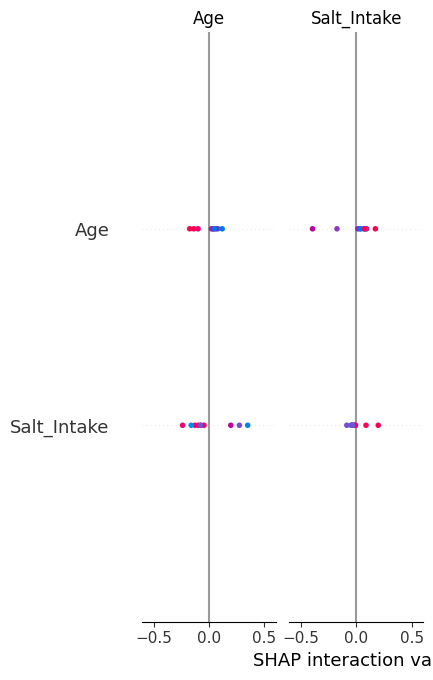

In [ ]:

# load model
X_subset = X_test.iloc[:10]

# SHAP explainer object
explainer = shap.Explainer(rf_model, X_subset)

# Calculate SHAP values for the subset
shap_values = explainer(X_subset)

# Display SHAP values
print("SHAP values shape:", shap_values.values.shape)  
print("X_subset shape:", X_subset.shape)               

# Visualize SHAP values
shap.summary_plot(shap_values.values, X_subset)


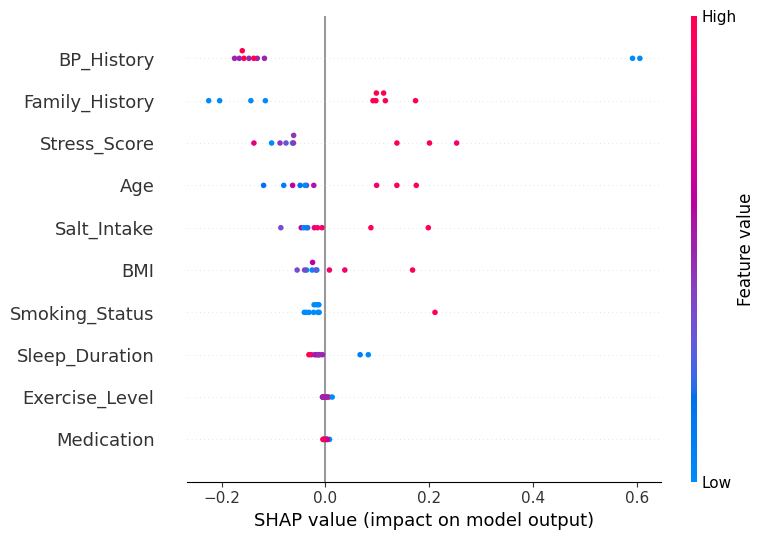

In [ ]:
# Visualize SHAP values for the second class (Has_Hypertension = 1)
shap.summary_plot(shap_values.values[:, :, 1], X_subset)


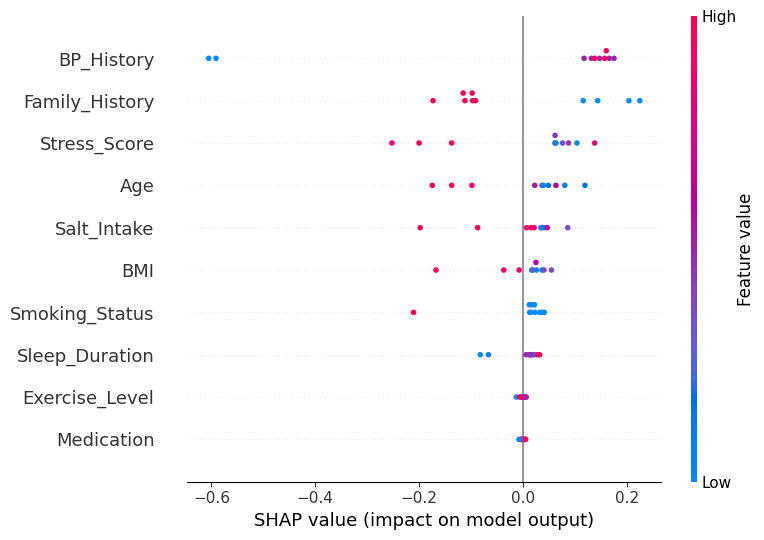

In [12]:
shap.summary_plot(shap_values.values[:, :, 0], X_subset)
